In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from pathlib import Path
import tensorflow as tf
from training import build_datasets, equalize_query_count, training_bird_query, class_ids_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast
from augmentation import RandomBrightness, RandomSaturation, RandomHue, RandomColorAddition
from classifiers import default_augmentation

BIRDS = "great tit", "robin", "chaff", "bull", "blue", "nuthatch", "gold", "green", "sparrow", "blackbird", "wood"
IMAGE_SIZE = (120, 120)
BATCH_SIZE = 32
BIRDS = [bird.lower() for bird in BIRDS]

In [9]:
queries = {bird: training_bird_query(bird, min_size=IMAGE_SIZE, crop=True, limit=5) for bird in BIRDS}
queries = equalize_query_count(queries)
train_ds, val_ds = build_datasets(queries, image_size=IMAGE_SIZE, validation_split=0.2, batch_size=BATCH_SIZE, crop=True)

Images per class: 5
Limiting class: great tit
Found 55 files belonging to 11 classes.
Using 44 files for training.
Found 55 files belonging to 11 classes.
Using 11 files for validation.


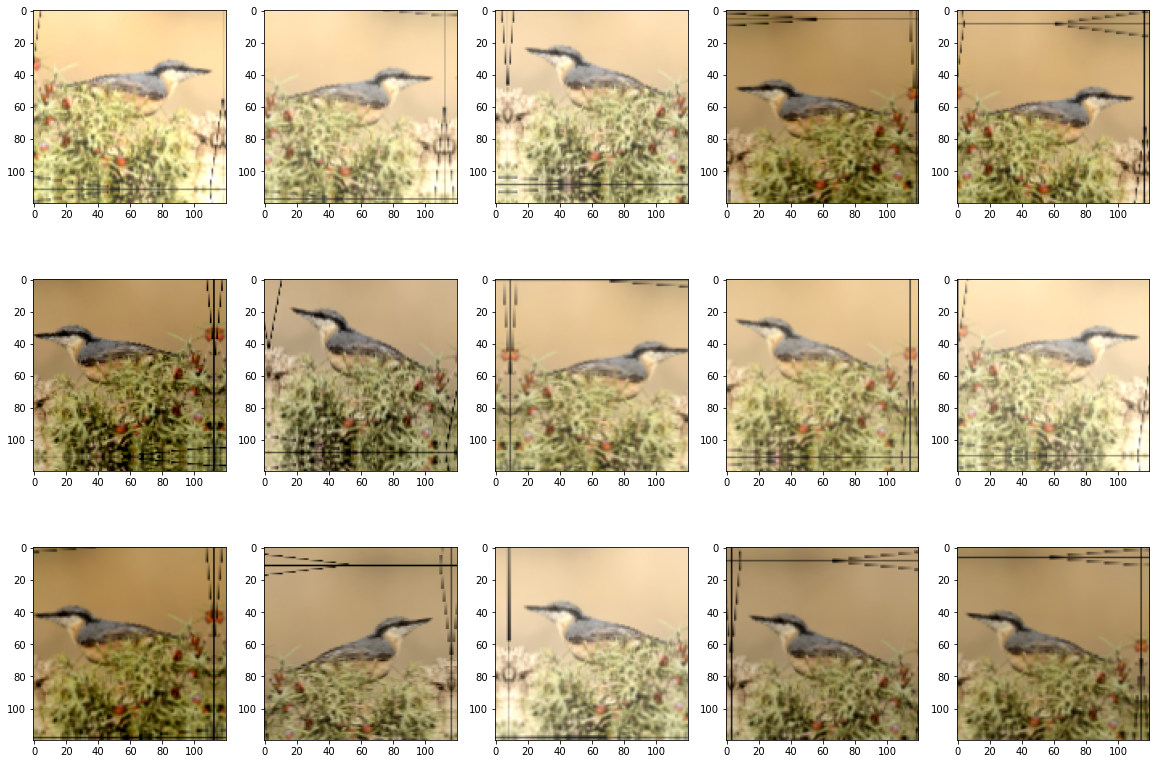

In [10]:


augmentation = default_augmentation()

plt.figure(figsize=(20, 14))
for image_batch, label_batch in train_ds.take(1):
    
    for i in range(15):
               
        test = augmentation.call(image_batch)
        test /= 255
        
        plt.subplot(3, 5, i+1)
        plt.imshow(test[0])
    plt.show()